# Segmentación de data set

Se tomaron 30 fotos, se quiere eliminar el fondo.

In [9]:
import cv2
import numpy as np
import os
from matplotlib import pyplot as plt

# Definir la ruta del dataset
dataset_path = 'Dataset'
image_files = sorted([os.path.join(dataset_path, f) for f in os.listdir(dataset_path) if f.endswith(('png', 'jpg', 'jpeg'))])

In [10]:
# Función para segmentar y enmascarar el objeto utilizando contornos
def segment_using_contours(image):
    # Convertir la imagen a escala de grises
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    
    # Aplicar un desenfoque para reducir el ruido
    blurred = cv2.GaussianBlur(gray, (5, 5), 0)
    
    # Aplicar el umbral adaptativo
    _, thresh = cv2.threshold(blurred, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
    
    # Encontrar los contornos
    contours, _ = cv2.findContours(thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    
    # Crear una máscara vacía
    mask = np.zeros_like(image)
    
    # Dibujar los contornos en la máscara
    cv2.drawContours(mask, contours, -1, (255, 255, 255), thickness=cv2.FILLED)
    
    # Aplicar la máscara a la imagen original
    result = cv2.bitwise_and(image, mask)
    
    return result

# Cargar las imágenes
images = [cv2.imread(f) for f in image_files]
print(f"Loaded {len(images)} images.")

# Aplicar la segmentación a todas las imágenes
segmented_images = [segment_using_contours(image) for image in images]

Loaded 30 images.


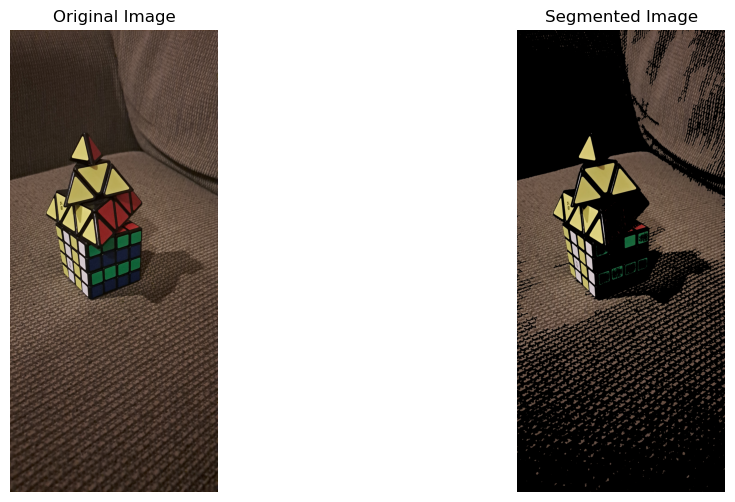

In [12]:
# Mostrar un ejemplo de imagen segmentada
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.imshow(cv2.cvtColor(images[1], cv2.COLOR_BGR2RGB))
plt.title('Original Image')
plt.axis('off')
plt.subplot(1, 2, 2)
plt.imshow(cv2.cvtColor(segmented_images[1], cv2.COLOR_BGR2RGB))
plt.title('Segmented Image')
plt.axis('off')
plt.show()

In [13]:
# Crear una carpeta para guardar las imágenes segmentadas
segmented_path = 'Segmented'
if not os.path.exists(segmented_path):
    os.makedirs(segmented_path)

# Guardar las imágenes segmentadas
for i, image in enumerate(segmented_images):
    output_path = os.path.join(segmented_path, f'segmented_{i+1}.png')
    cv2.imwrite(output_path, image)

print(f"Segmented images saved to {segmented_path}.")

Segmented images saved to Segmented.


## Angulos de las cámaras usando NERF

Se utiliza NERF para conocer las posiciones de las cámaras.

Para utilizar NeRF (Neural Radiance Fields), necesitas conocer las poses de las cámaras desde las cuales se tomaron las fotos. Estas poses incluyen la posición y la orientación de cada cámara en el espacio 3D. Una herramienta comúnmente utilizada para determinar estas poses es COLMAP.

### ¿Qué Son los Ángulos en el Contexto de NeRF?

En el contexto de NeRF, los "ángulos" se refieren a las orientaciones de las cámaras desde las cuales se tomaron las fotos. Cada pose de cámara incluye:
- **Posición**: La ubicación de la cámara en el espacio 3D.
- **Orientación**: La dirección en la que la cámara está mirando, a menudo representada como una matriz de rotación o un cuaternión.

### Usar COLMAP para Determinar las Poses de Cámara

COLMAP es una herramienta para reconstrucción 3D que utiliza Structure from Motion (SfM) para calcular las poses de las cámaras y la estructura de la escena a partir de un conjunto de imágenes.

In [3]:
import os
from PIL import Image

def compress_and_resize_image(input_path, output_path, max_size=(512, 512)):
    with Image.open(input_path) as img:
        # Redimensionar la imagen
        img.thumbnail(max_size, Image.LANCZOS)

        # Guardar la imagen con compresión
        img.save(output_path, format="PNG", optimize=True)

# Configuración de carpetas
input_folder = '/Users/guillermo_sego/Desktop/Segundo Semestre/CVision/Proyecto Final/Pato/images'
output_folder = '/Users/guillermo_sego/Desktop/Segundo Semestre/CVision/Proyecto Final/PatoOutput'

if not os.path.exists(output_folder):
    os.makedirs(output_folder)

# Procesar cada archivo en la carpeta de entrada
for filename in os.listdir(input_folder):
    if filename.endswith('.png'):
        # Rutas de las imágenes de entrada y salida
        input_path = os.path.join(input_folder, filename)
        output_path = os.path.join(output_folder, filename)

        # Redimensionar y comprimir la imagen
        compress_and_resize_image(input_path, output_path)

print("Proceso completado!")


Proceso completado!
